* # Ejercicio 2 y ejercicio 3
* Práctica 3

* **Javier Francisco Castilla Jiménez**

In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import NeuralFunctJC as nrn

In [2]:
plt.style.use('Solarize_Light2')

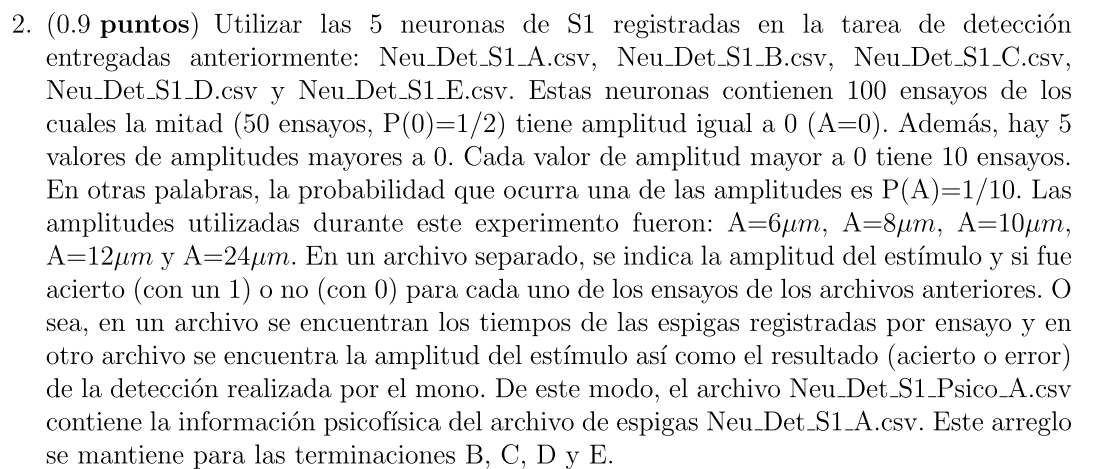

# Cargamos los datos

In [3]:
#Ensayos

In [4]:
llaves=['A','B','C','D','E']

In [5]:
NeuDetS1A=nrn.importar('Neu_Det_S1A.csv')
NeuDetS1B=nrn.importar('Neu_Det_S1B.csv')
NeuDetS1C=nrn.importar('Neu_Det_S1C.csv')
NeuDetS1D=nrn.importar('Neu_Det_S1D.csv')
NeuDetS1E=nrn.importar('Neu_Det_S1E.csv')
Neurons={'A':NeuDetS1A,'B':NeuDetS1B,'C':NeuDetS1C,'D':NeuDetS1D,'E':NeuDetS1E}


In [13]:
len(NeuDetS1A[3])

447

In [6]:
bqA=list((nrn.bloques(nrn.abrir('Neu_Det_S1A.csv'))))
bqB=list((nrn.bloques(nrn.abrir('Neu_Det_S1B.csv'))))
bqC=list((nrn.bloques(nrn.abrir('Neu_Det_S1C.csv'))))
bqD=list((nrn.bloques(nrn.abrir('Neu_Det_S1D.csv'))))
bqE=list((nrn.bloques(nrn.abrir('Neu_Det_S1E.csv'))))

bqs={'A':bqA,'B':bqB,'C':bqC,'D':bqD,'E':bqE}


In [7]:
#Amplitud y resultado

In [8]:
amplitudes=(0,6,8,10,12,24)
psicoS1A=nrn.importar3('Neu_Det_S1_psico_A.csv',amplitudes)
psicoS1B=nrn.importar3('Neu_Det_S1_psico_B.csv',amplitudes)
psicoS1C=nrn.importar3('Neu_Det_S1_psico_C.csv',amplitudes)
psicoS1D=nrn.importar3('Neu_Det_S1_psico_D.csv',amplitudes)
psicoS1E=nrn.importar3('Neu_Det_S1_psico_E.csv',amplitudes)
psicos=[psicoS1A,psicoS1B,psicoS1C,psicoS1D,psicoS1E]
psicosd={'A':psicoS1A,'B':psicoS1B,'C':psicoS1C,'D':psicoS1D,'E':psicoS1E}

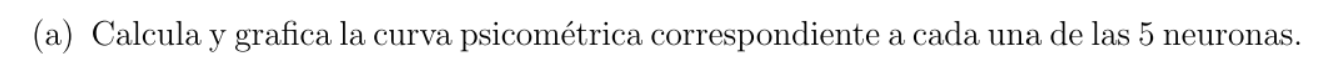

In [11]:
probas=['probsiS1A','probsiS1B','probsiS1C','probsiS1D','probsiS1E']
for i in range(len(probas)):
    probas[i]=nrn.proba_psi(psicos[i],amplitudes)

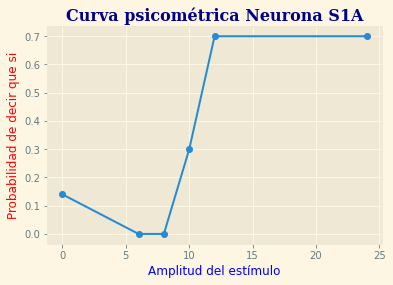

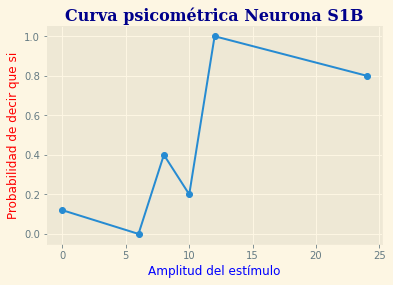

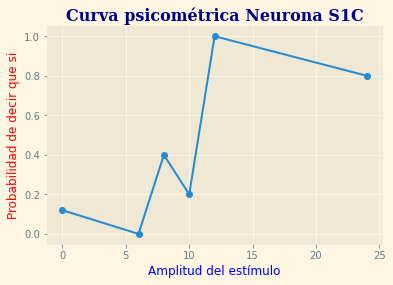

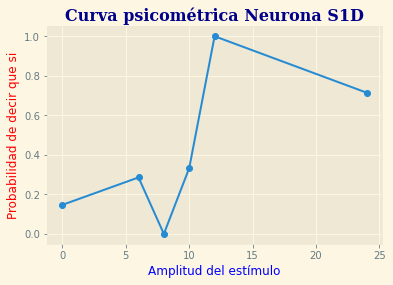

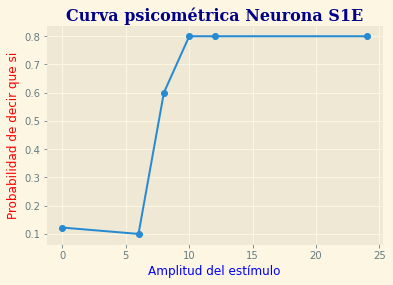

In [12]:
nombres=['Neurona S1A','Neurona S1B','Neurona S1C','Neurona S1D','Neurona S1E']
for i in range(len(probas)):
    nrn.curvepsi(amplitudes,probas[i],'Curva psicométrica '+nombres[i])

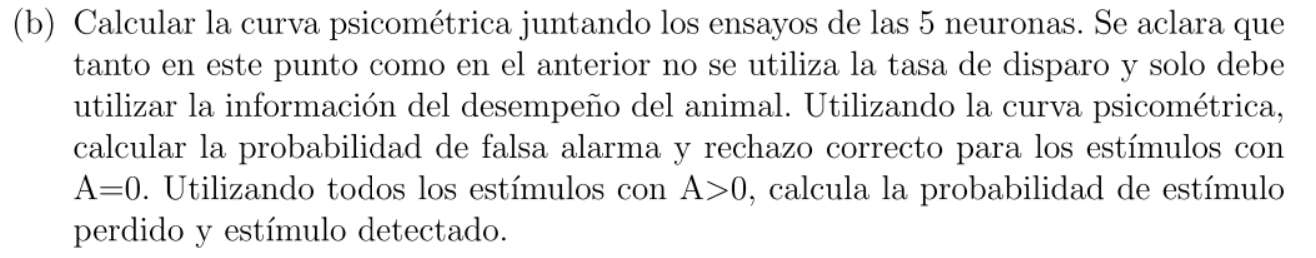

In [13]:
neujuntas=[]
for i in range(len(amplitudes)):
    x=np.concatenate((psicoS1A[i],psicoS1B[i],psicoS1C[i],psicoS1D[i],psicoS1E[i]))
    neujuntas.append(x)

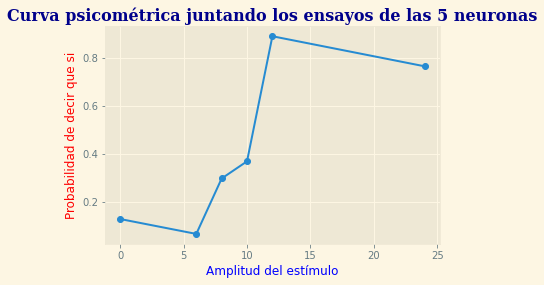

In [14]:
probajuntas=nrn.proba_psi(neujuntas,amplitudes)
nrn.curvepsi(amplitudes,probajuntas,'Curva psicométrica juntando los ensayos de las 5 neuronas')

In [15]:
amajzero=np.concatenate((neujuntas[1],neujuntas[2],neujuntas[3],neujuntas[4],neujuntas[5]))

In [16]:
len(amajzero)

231

In [17]:
print('Para los ensayos dónde A=0 tenemos que:\n')
print('La probabilidad de rechazo correcto (probabilidad de decir que no) es:',(np.sum(neujuntas[0]==1))/len(neujuntas[0]))
print('La probabilidad de Falsa alarma(probabilidad de decir que si) es:',(np.sum(neujuntas[0]==0))/len(neujuntas[0]))
print('\n')
print('Para los ensayos dónde A>0 tenemos que:\n')
print('La probabilidad de estímulo perdido (probabilidad de decir que no) es:',(np.sum(amajzero==0))/len(amajzero))
print('La probabilidad de estímulo detectado(probabilidad de decir que si) es:',(np.sum(amajzero==1))/len(amajzero))

Para los ensayos dónde A=0 tenemos que:

La probabilidad de rechazo correcto (probabilidad de decir que no) es: 0.871244635193133
La probabilidad de Falsa alarma(probabilidad de decir que si) es: 0.12875536480686695


Para los ensayos dónde A>0 tenemos que:

La probabilidad de estímulo perdido (probabilidad de decir que no) es: 0.5194805194805194
La probabilidad de estímulo detectado(probabilidad de decir que si) es: 0.4805194805194805


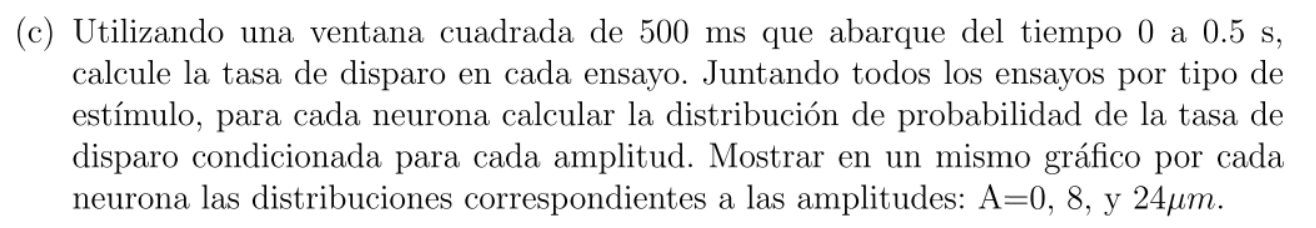

In [18]:
Tns1={'A':'tNeuDetS1A','B':'tNeuDetS1B','C':'tNeuDetS1C','D':'tNeuDetS1D','E':'tNeuDetS1E'}
func=lambda ensayo : nrn.tasa(ensayo,nventanas=1,paso=0.5,ventana=0.5,start=0)# esta función calcula la tasa de disparo de un ensayo nventanas, paso=0.01,ventana=0.05,start=-2 
for llave in llaves:
    fr=map(func,Neurons[llave]) # array con las tasas de disparo para cada ventana
    Tns1[llave]=np.array(list(fr))

In [19]:
Tns={'A':'tNeuDetS1A','B':'tNeuDetS1B','C':'tNeuDetS1C','D':'tNeuDetS1D','E':'tNeuDetS1E'}
for llave in llaves:
    frc=nrn.clases(Tns1[llave],bqs[llave])
    Tns[llave]=frc

In [20]:
iamp=[1,5]

In [21]:
def probabilidades(datos):
    #generamos la tabla de frecuencias utilizando solo numpy
    valores,frecuencia=np.unique(datos, return_counts=True) # contamos los valores unicos y los asignasmos a lista de valores # contamos la frecuencia de cada valor unico y lo asignamos a 
    orden=np.argsort(frecuencia)
    frecuencia=frecuencia[orden]
    valores=valores[orden]
    acumulada=np.cumsum(frecuencia)# creamos un array con la frecuencia acumulada
    relativa=frecuencia/acumulada[-1] #divimos la frecuencia entre el número elementos que corresponde a acumulada[-1] también corresponde a len(valores)
    return valores,relativa

In [22]:
pNrn={'A':'S1A','B':'S1B','C':'S1C','D':'S1D','E':'S1E'}
values={'A':'SA','B':'SB','C':'SC','D':'SD','E':'SE'}
nombres={'A':'Neurona S1A','B':'Neurona S1B','C':'Neurona S1C','D':'Neurona S1D','E':'Neurona S1E'}

In [23]:
for llave in llaves:
    val1,prob1=probabilidades(Tns[llave][0])# amplitud 
    val2,prob2=probabilidades(Tns[llave][1])
    val3,prob3=probabilidades(Tns[llave][5])# amplitud
    pNrn[llave]=[prob1,prob2,prob3]
    values[llave]=[val1,val2,val3]

In [24]:
def distp(tasa,prob,nombre,leye):
    fontdict_title = {'family': 'serif','color':  'darkblue','weight': 'bold','size': 16,} # formato para el título
    plt.title(nombre, fontdict_title) #título de la gráfica
    plt.xlabel("Tasa de disparo [Hz]",color='blue') # Configuramos la etiqueta del eje X
    plt.ylabel("Probabilidad",color='red') # Configuramos la etiqueta del eje Y
    plt.bar(tasa,prob,label=leye)

In [25]:
values['A']

[array([78., 52., 76., 60., 66., 54., 34., 26., 20., 74., 56., 68., 28.,
        22., 40., 44., 50., 18., 14., 38., 32., 30., 42., 58., 36.]),
 array([34., 38., 40., 44., 64., 76., 30., 42.]),
 array([ 92., 100., 104., 110., 112., 114., 116., 136., 106.])]

In [26]:
pNrn['A']

[array([0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02,
        0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.06, 0.06, 0.06, 0.06,
        0.06, 0.08, 0.12]),
 array([0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.2, 0.2]),
 array([0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.2])]

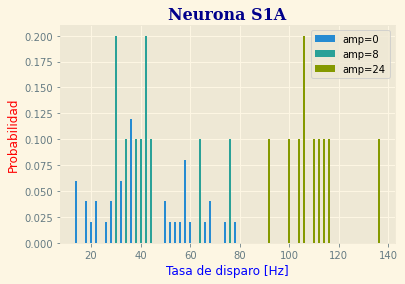

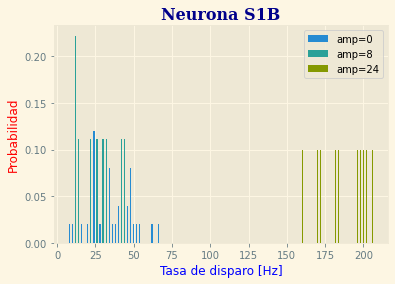

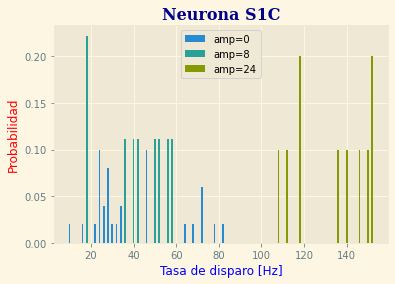

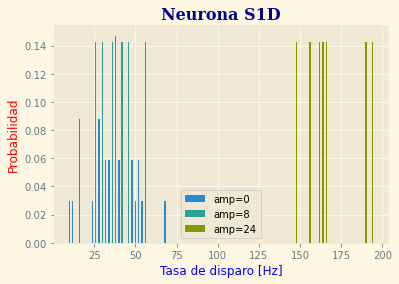

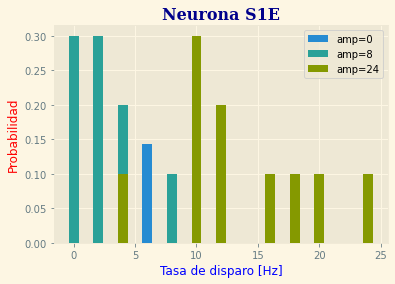

In [27]:
for llave in llaves:
    distp(values[llave][0],pNrn[llave][0],nombres[llave],'amp=0')
    distp(values[llave][1],pNrn[llave][1],nombres[llave],'amp=8')
    distp(values[llave][2],pNrn[llave][2],nombres[llave],'amp=24')
    plt.legend()
    plt.show()
    


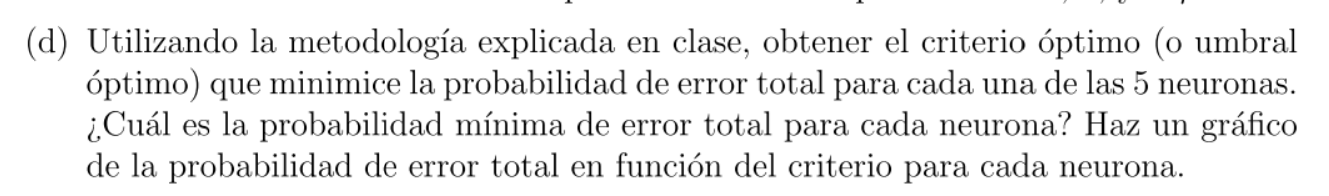

Recordemos que el diccionario Tns contiene las tasas de disparo separadas por clase
y que el diccionario nombres tiene los nombres de cada neurona

In [28]:
def criterio_opt(tasa):
    """Esta función determina el criterio optimo para determinar un criterio optimo de forma
    tal que se minimicen los errores y se maximicen los aciertos(la recompensa)
    Parametros:
    tasa = El array de datos de las tasas de disparo
    Return:
    La funcion nos regresa una lista con los criterios posibles y los valores de probabilidad de error asociados a cada
    uno de esos criterios,también nos devuelve el criterio optimo y su probabilidad de error (la probabilidad de error minima)."""
    tamaño=[len(e)for e in tasa]
    mini=min(min(e)for e in tasa)
    maxi=max(max(e)for e in tasa)
    criterios_posibles=np.arange(np.round(mini)-1,np.round(maxi)+1,.01)
    errores=np.zeros_like(criterios_posibles)
    for i in range (len(criterios_posibles)):
        criterio=criterios_posibles[i]
        error=np.sum(tasa[0]>=criterio)
        error+=np.sum([sum(tasa[clas]<=criterio)for clas in range(1,6)])
        errores[i]=error/sum(tamaño)
    return [criterios_posibles,errores,criterios_posibles[np.argmin(errores)],np.min(errores)]


Criterio Óptimo =  40.00999999999942
Probabilidad Mínima de Error =  0.36


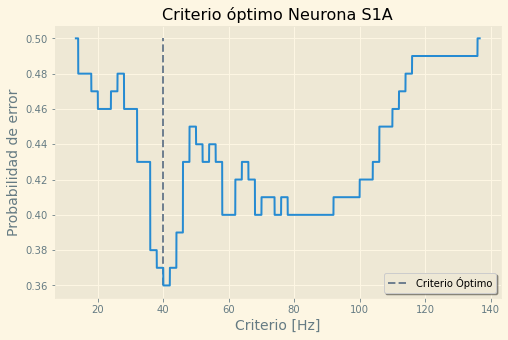

Criterio Óptimo =  62.009999999998826
Probabilidad Mínima de Error =  0.24242424242424243


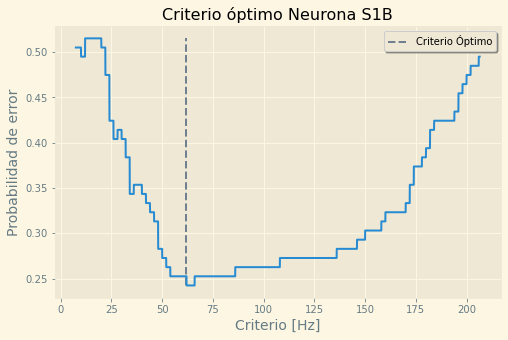

Criterio Óptimo =  72.00999999999866
Probabilidad Mínima de Error =  0.25252525252525254


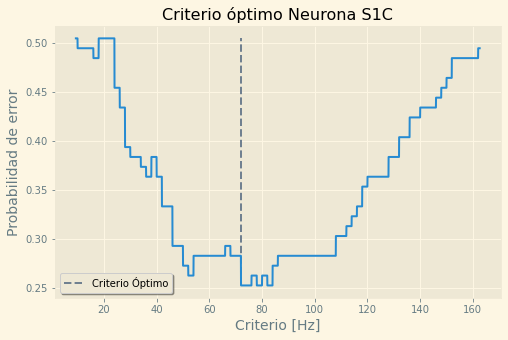

Criterio Óptimo =  54.00999999999904
Probabilidad Mínima de Error =  0.2835820895522388


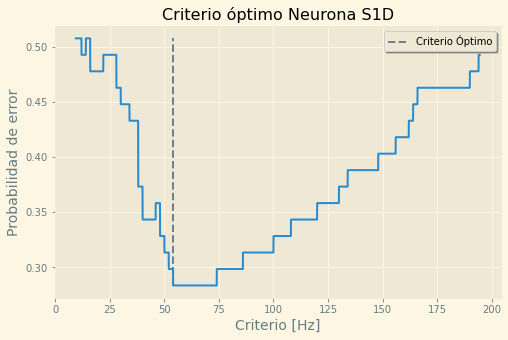

Criterio Óptimo =  6.000000000000006
Probabilidad Mínima de Error =  0.2222222222222222


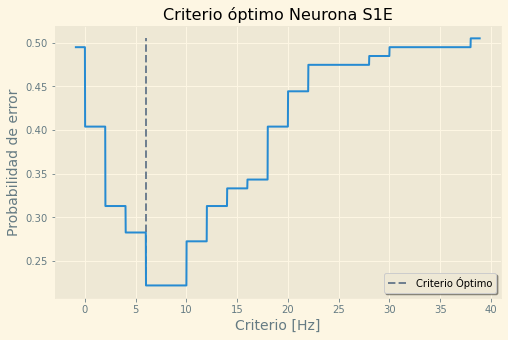

In [29]:
crioptimos={'A':'cSA','B':'cSB','C':'cSC','D':'cSD','E':'cSE'}
for llave in llaves:
    criterios_p,errores,critopt,errormin=criterio_opt(Tns[llave])
    crioptimos[llave]=critopt
    titulo=nombres[llave]
    fig = plt.figure(figsize=(8,5))
    plt.plot(criterios_p,errores)
    plt.xlabel("Criterio [Hz]",fontsize=14)
    plt.ylabel("Probabilidad de error",fontsize=14)
    plt.title("Criterio óptimo "+ titulo)
    plt.vlines(critopt,min(errores),max(errores),ls="--",color="slategray",label="Criterio Óptimo")
    plt.legend(fontsize="medium",shadow=True,fancybox=True)
    print("Criterio Óptimo = ",critopt)
    print("Probabilidad Mínima de Error = ",errormin)
    plt.show()

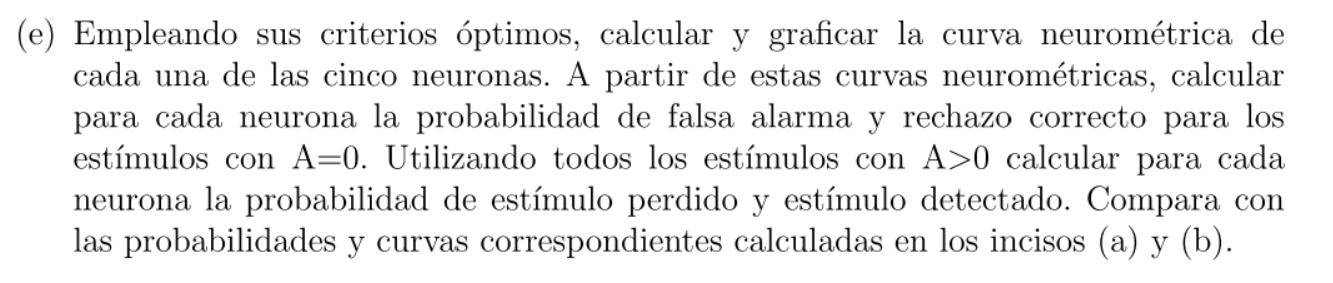

In [30]:
def nrmetrics(tasa,crit,clases):
    """Está funcion es revisa cuantos de los valores la tasa cumplen el criterio óptimo 
    y cálcula la probabilidad"""
    frec = np.zeros(clases)
    totald = [len(clas) for clas in tasa]
    for i in range(clases): #son seis ciclos 1 por cada clase/amplitud
        for dat in tasa[i]: # itera cada dato en cada array de tasas de cada condición
            if dat > crit: #criterio optimo
                frec[i] += 1 
    prob=frec/totald
    p_edetectado=np.sum(frec[1:-1])/np.sum(totald[1:-1])
    p_falsaalarma=frec[0]/totald[0]
    p_rechazoco=1-p_falsaalarma
    p_estperdido=1-p_edetectado
    return [ prob,p_edetectado,p_falsaalarma,p_rechazoco,p_estperdido]

probabilidad de estímulo perdido 0.375
probabilidad de rechazo correcto 0.5800000000000001
probabilidad de estímulo detectado 0.625
probabilidad de falsa alarma 0.42


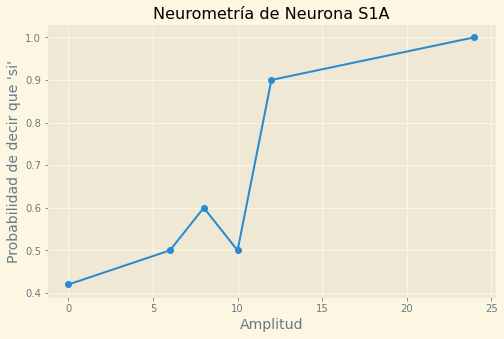

probabilidad de estímulo perdido 0.5897435897435898
probabilidad de rechazo correcto 0.98
probabilidad de estímulo detectado 0.41025641025641024
probabilidad de falsa alarma 0.02


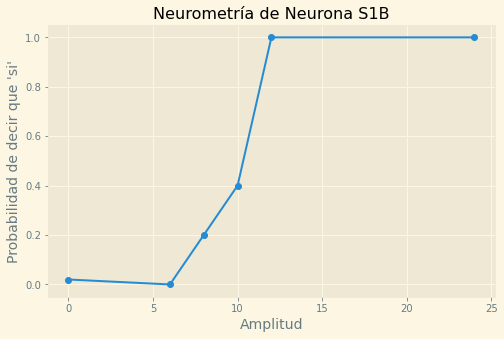

probabilidad de estímulo perdido 0.5897435897435898
probabilidad de rechazo correcto 0.96
probabilidad de estímulo detectado 0.41025641025641024
probabilidad de falsa alarma 0.04


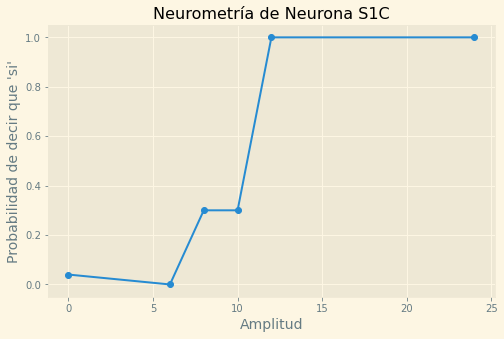

probabilidad de estímulo perdido 0.6538461538461539
probabilidad de rechazo correcto 0.9411764705882353
probabilidad de estímulo detectado 0.34615384615384615
probabilidad de falsa alarma 0.058823529411764705


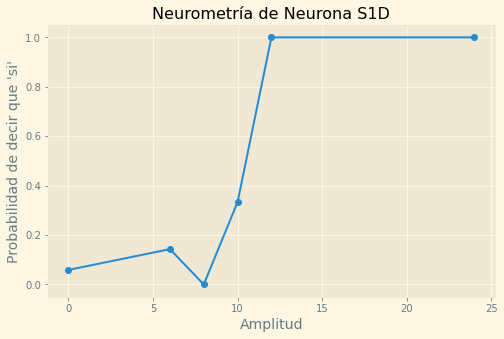

probabilidad de estímulo perdido 0.25
probabilidad de rechazo correcto 0.7755102040816326
probabilidad de estímulo detectado 0.75
probabilidad de falsa alarma 0.22448979591836735


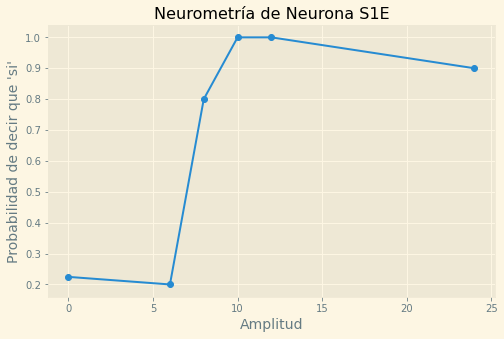

In [31]:
for llave in llaves:
    titulo=nombres[llave]
    p,pdetectado,pfalsa,precha,pperdido=nrmetrics(Tns[llave],crioptimos[llave],6)
    fig = plt.figure(figsize=(8,5))
    plt.scatter(amplitudes,p)
    plt.plot(amplitudes,p)
    plt.xlabel("Amplitud",fontsize=14)
    plt.ylabel("Probabilidad de decir que 'si'",fontsize=14)
    plt.title("Neurometría de "+ titulo)
   
    print('probabilidad de estímulo perdido',pperdido)
    print('probabilidad de rechazo correcto',precha)
    print('probabilidad de estímulo detectado',pdetectado)
    print('probabilidad de falsa alarma',pfalsa)
    plt.show()

In [32]:
probas={'A':'probsiS1A','B':'probsiS1B','C':'probsiS1C','D':'probsiS1D','E':'probsiS1E'}
for llave in llaves:
    probas[llave]=nrn.proba_psi(psicosd[llave],amplitudes)

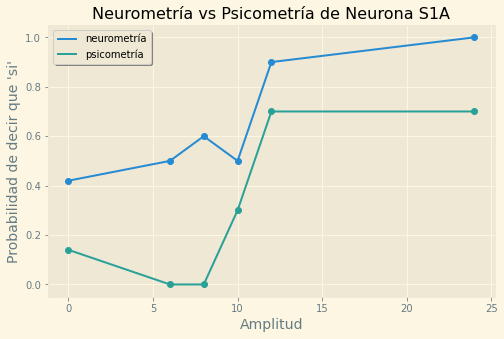

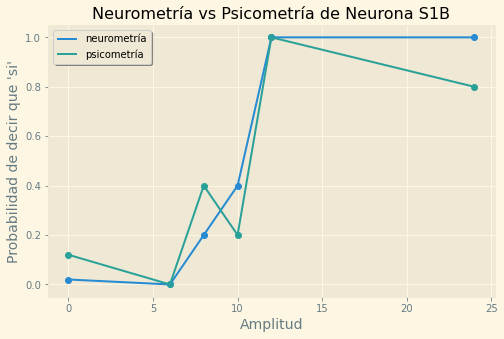

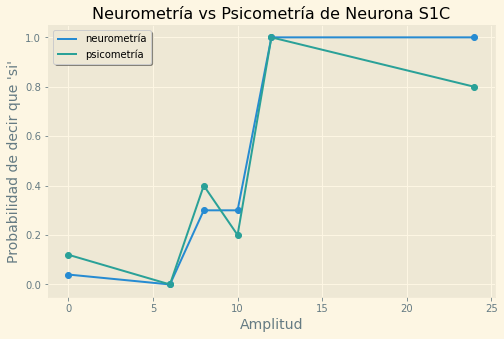

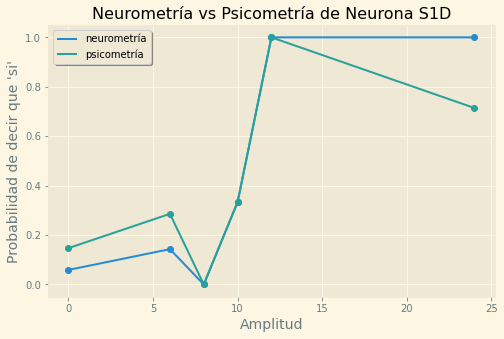

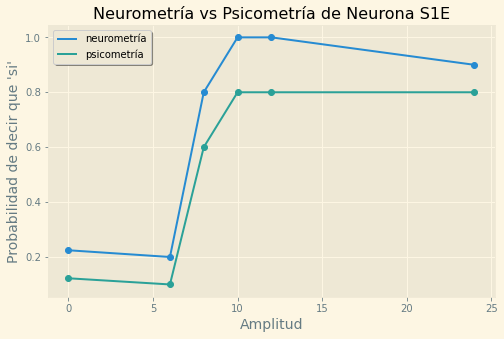

In [33]:
for llave in llaves:
    titulo=nombres[llave]
    p,pdetectado,pfalsa,precha,pperdido=nrmetrics(Tns[llave],crioptimos[llave],6)
    fig = plt.figure(figsize=(8,5))
    plt.scatter(amplitudes,p)
    plt.plot(amplitudes,p,label='neurometría')
    plt.scatter(amplitudes,probas[llave])
    plt.plot(amplitudes,probas[llave],label='psicometría')
    plt.xlabel("Amplitud",fontsize=14)
    plt.ylabel("Probabilidad de decir que 'si'",fontsize=14)
    plt.title("Neurometría vs Psicometría de "+ titulo)
    plt.legend(fontsize="medium",shadow=True,fancybox=True)
    plt.show()

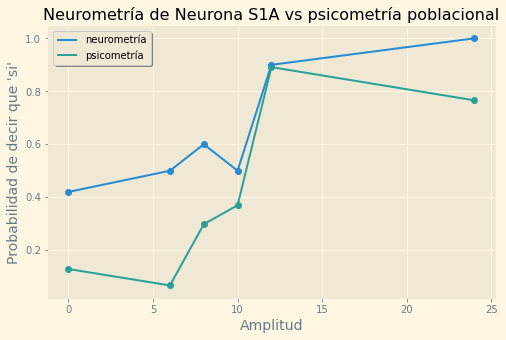

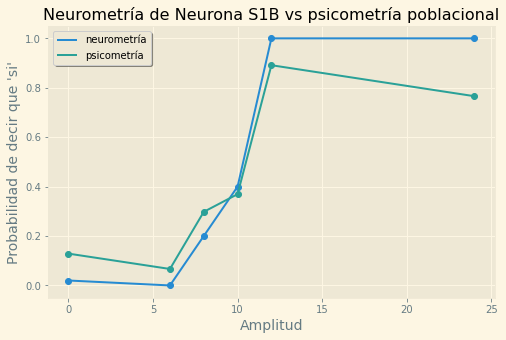

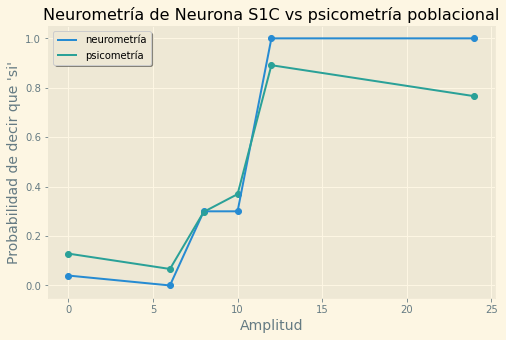

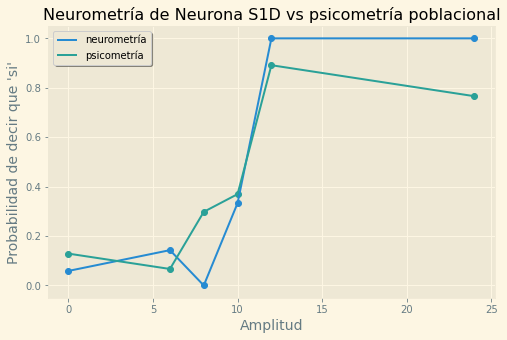

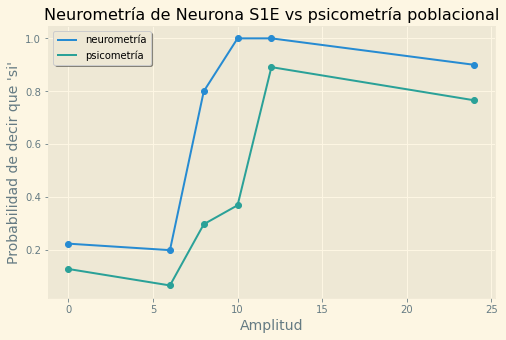

In [34]:
for llave in llaves:
    titulo=nombres[llave]
    p,pdetectado,pfalsa,precha,pperdido=nrmetrics(Tns[llave],crioptimos[llave],6)
    fig = plt.figure(figsize=(8,5))
    plt.scatter(amplitudes,p)
    plt.plot(amplitudes,p,label='neurometría')
    plt.scatter(amplitudes,probajuntas)
    plt.plot(amplitudes,probajuntas,label='psicometría')
    plt.xlabel("Amplitud",fontsize=14)
    plt.ylabel("Probabilidad de decir que 'si'",fontsize=14)
    plt.title("Neurometría de "+ titulo+" vs psicometría poblacional")
    plt.legend(fontsize="medium",shadow=True,fancybox=True)
    plt.show()

In [35]:
for llave in llaves:
    p,pdetectado,pfalsa,precha,pperdido=nrmetrics(Tns[llave],crioptimos[llave],6)
    titulo=nombres[llave]
    
    print('para la '+titulo)
    print('probabilidad de estímulo perdido',pperdido)
    print('probabilidad de rechazo correcto',precha)
    print('probabilidad de estímulo detectado',pdetectado)
    print('probabilidad de falsa alarma',pfalsa)
    plt.show()

para la Neurona S1A
probabilidad de estímulo perdido 0.375
probabilidad de rechazo correcto 0.5800000000000001
probabilidad de estímulo detectado 0.625
probabilidad de falsa alarma 0.42
para la Neurona S1B
probabilidad de estímulo perdido 0.5897435897435898
probabilidad de rechazo correcto 0.98
probabilidad de estímulo detectado 0.41025641025641024
probabilidad de falsa alarma 0.02
para la Neurona S1C
probabilidad de estímulo perdido 0.5897435897435898
probabilidad de rechazo correcto 0.96
probabilidad de estímulo detectado 0.41025641025641024
probabilidad de falsa alarma 0.04
para la Neurona S1D
probabilidad de estímulo perdido 0.6538461538461539
probabilidad de rechazo correcto 0.9411764705882353
probabilidad de estímulo detectado 0.34615384615384615
probabilidad de falsa alarma 0.058823529411764705
para la Neurona S1E
probabilidad de estímulo perdido 0.25
probabilidad de rechazo correcto 0.7755102040816326
probabilidad de estímulo detectado 0.75
probabilidad de falsa alarma 0.224489

De forma que la probabilidad de estímulo perdido  en la psicometría poblacional es menor al de las neuronas B,C,D entre las probabilidades, la probabilidad de rechazo correcto de la psicometría poblacional es menor que la de la neurometría de las neuronas B,C y D.  justamente la probabilidad de estímulo detectado (de la psicometria poblacional) es menor que la probabilidad (de la neurometría) de las neuronas B,C y D. La probabilidad de falsa alarma de la psicometría poblacional es mayor que la de las neurometrías de las neuronas B,C y D.

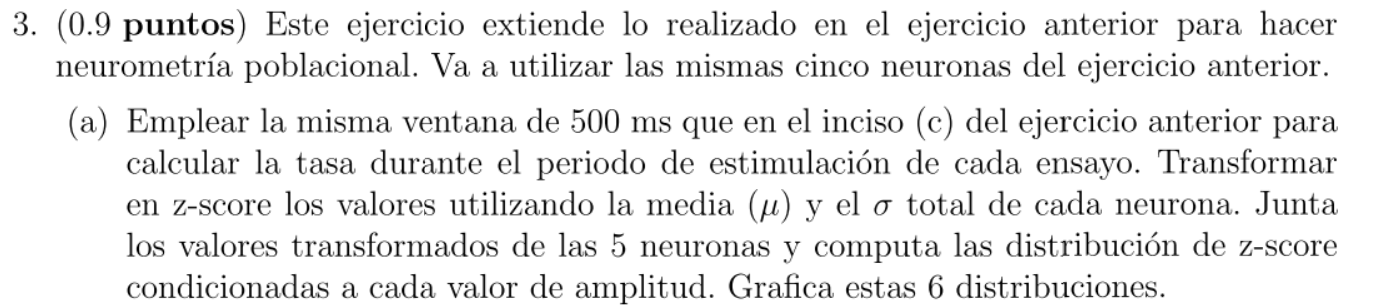

In [104]:
Tasas={'A':'tNeuDetS1A','B':'tNeuDetS1B','C':'tNeuDetS1C','D':'tNeuDetS1D','E':'tNeuDetS1E'}
func=lambda ensayo : nrn.tasa(ensayo,nventanas=1,paso=0.5,ventana=0.5,start=0)# esta función calcula la tasa de disparo de un ensayo nventanas, paso=0.01,ventana=0.05,start=-2 
for llave in llaves:
    fr=map(func,Neurons[llave]) # array con las tasas de disparo para cada ventana
    Tasas[llave]=np.array(list(fr))

In [105]:
TasasT={'A':'tNeuDetS1A','B':'tNeuDetS1B','C':'tNeuDetS1C','D':'tNeuDetS1D','E':'tNeuDetS1E'}
bsup,nven=nrn.bordesup(start=-2,stop=3.5,paso=0.5,ventana=0.5,nv=True) 
func=lambda ensayo : nrn.tasa(ensayo,nventanas=nven,paso=0.5,ventana=0.5,start=-2)# esta función calcula la tasa de disparo de un ensayo nventanas, paso=0.01,ventana=0.05,start=-2 
for llave in llaves:
    fr=map(func,Neurons[llave]) # array con las tasas de disparo para cada ventana
    TasasT[llave]=np.array(list(fr))

In [106]:
def zscore_g(tasae,tasaT):
    media=np.mean(tasaT)
    sigma=np.std(tasaT)
    print(media,sigma)
    z=(tasae-media)/sigma
    return z

In [107]:
zs={'A':'zNeuDetS1A','B':'zNeuDetS1B','C':'zNeuDetS1C','D':'zNeuDetS1D','E':'zNeuDetS1E'}
for llave in llaves:
    z=zscore_g(Tasas[llave],TasasT[llave])
    #zs[llave]=z
    zs[llave]=nrn.clases(z,bqs[llave])

42.594545454545454 18.430981014504486
37.5959595959596 26.427130475727097
45.57208448117539 22.75651838257435
35.511533242876524 22.886664066352544
6.112029384756657 5.934934350425156


In [108]:
len(zs['A'])

6

In [109]:
amplitudes=(0,6,8,10,12,24)

In [110]:
zmezcla={'0':'z0','6':'z6','8':'z8','10':'z10','12':'z12','24':'z24'}

In [111]:
for i in range(len(amplitudes)):
    zmez=np.concatenate((zs['A'][i],zs['B'][i],zs['C'][i],zs['D'][i],zs['E'][i]))
    zmezcla[str(amplitudes[i])]=zmez

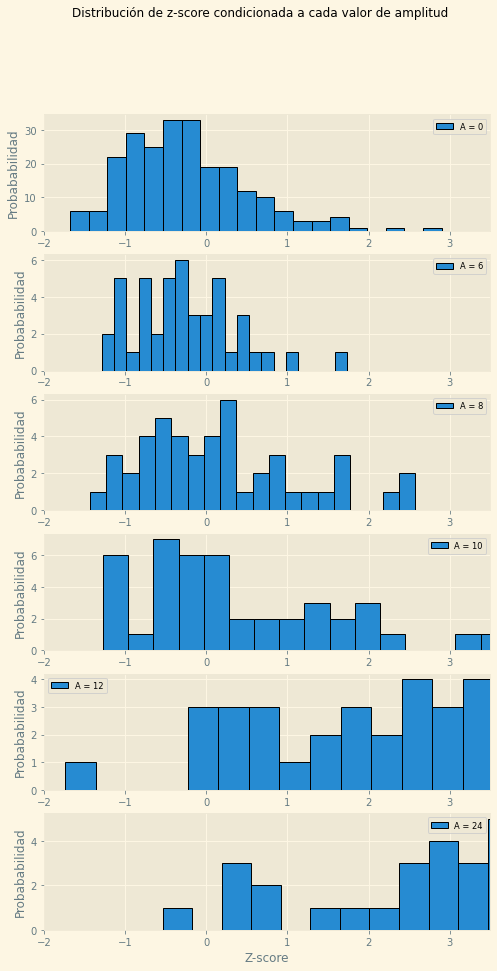

In [112]:
fig = plt.figure(figsize=(8,15))
fig.suptitle("Distribución de z-score condicionada a cada valor de amplitud")
ax = fig.subplots(len(amplitudes))
ax[-1].set_xlabel("Z-score")
for i in range(len(amplitudes)):
    frec,bins = np.histogram(zmezcla[str(amplitudes[i])],bins=20)
    proba = frec/len(zmezcla[str(amplitudes[i])])
    ax[i].bar(bins[:-1],frec,width=np.diff(bins), ec="k", label="A = {}".format(amplitudes[i]))
    ax[i].set_ylabel("Probababilidad")
    ax[i].set_xlim(-2,3.5)
    ax[i].legend(fontsize="small")

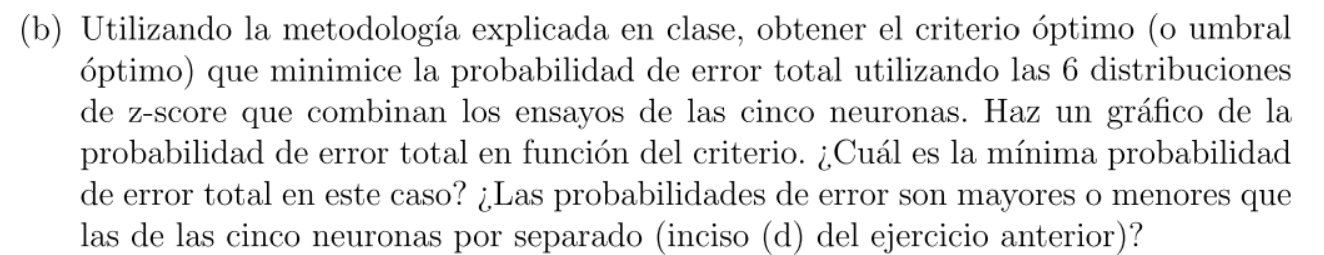

La mínima probabilidad de error en este caso es 0.29 lo cuál al comparlo con la de las cinco neuronas por separado del inciso d) del ejercicio anterior vemos que es menor que la probabilidad mínima de error de S1A pero mayor que la de las otras neuronas.

Criterio Óptimo =  0.989999999999915
Probabilidad Mínima de Error =  0.2974137931034483


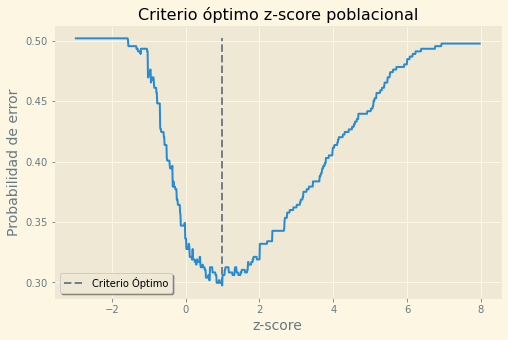

In [113]:

zcriterios_p,errores,zcritopt,errormin=criterio_opt(list(zmezcla.values()))
titulo='z-score poblacional'
fig = plt.figure(figsize=(8,5))
plt.plot(zcriterios_p,errores)
plt.xlabel("z-score",fontsize=14)
plt.ylabel("Probabilidad de error",fontsize=14)
plt.title("Criterio óptimo "+ titulo)
plt.vlines(zcritopt,min(errores),max(errores),ls="--",color="slategray",label="Criterio Óptimo")
plt.legend(fontsize="medium",shadow=True,fancybox=True)
print("Criterio Óptimo = ",zcritopt)
print("Probabilidad Mínima de Error = ",errormin)
plt.show()

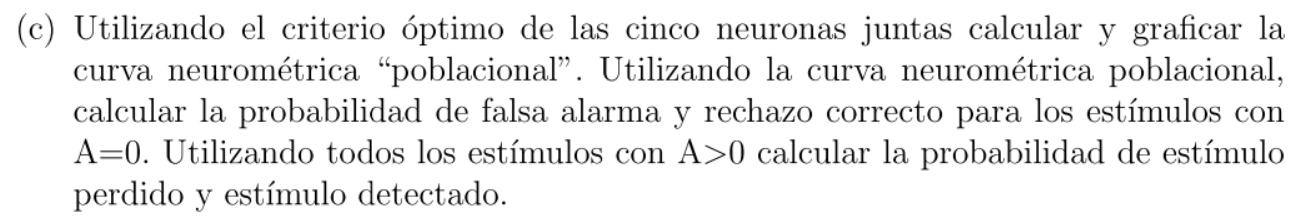

probabilidad de estímulo perdido 0.6304347826086957
probabilidad de rechazo correcto 0.9227467811158798
probabilidad de estímulo detectado 0.3695652173913043
probabilidad de falsa alarma 0.07725321888412018


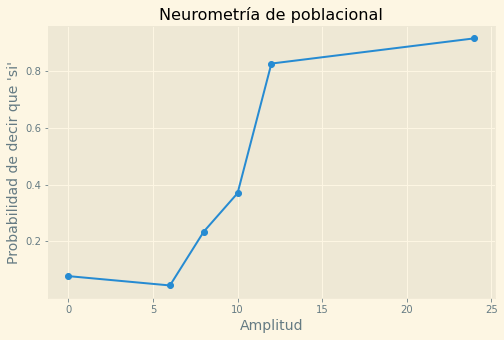

In [103]:
titulo='poblacional'
p,pdetectado,pfalsa,precha,pperdido=nrmetrics(list(zmezcla.values()),zcritopt,6)
fig = plt.figure(figsize=(8,5))
plt.scatter(amplitudes,p)
plt.plot(amplitudes,p)
plt.xlabel("Amplitud",fontsize=14)
plt.ylabel("Probabilidad de decir que 'si'",fontsize=14)
plt.title("Neurometría de "+ titulo)
print('probabilidad de estímulo perdido',pperdido)
print('probabilidad de rechazo correcto',precha)
print('probabilidad de estímulo detectado',pdetectado)
print('probabilidad de falsa alarma',pfalsa)
plt.show()

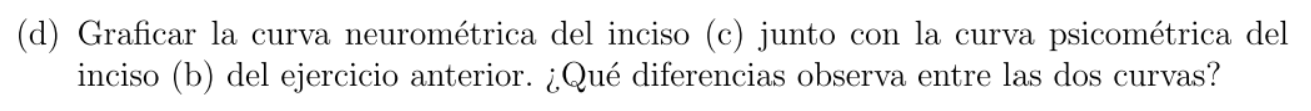

La diferencia más notable entre está dos curvas es que la probabilidad de decir que si de la neurometría poblacional es menor o igual que la de la psicometría poblacional para todas las amplitudes excepto 24.Sin embargo tienen una forma muy parecida y los valores entre una y otra siempre están muy cercanos entre si, lo cuál es muy consistente con la idea de que la neurometría en cierto grado nos permite ver el proceso biológico detrás de la psicometría.

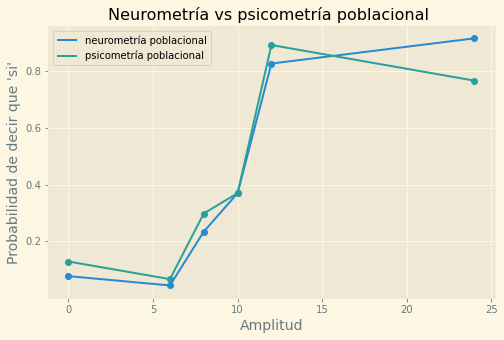

In [102]:
fig = plt.figure(figsize=(8,5))
plt.scatter(amplitudes,p)
plt.plot(amplitudes,p,label='neurometría poblacional')
plt.scatter(amplitudes,probajuntas)
plt.plot(amplitudes,probajuntas,label='psicometría poblacional')
plt.xlabel("Amplitud",fontsize=14)
plt.ylabel("Probabilidad de decir que 'si'",fontsize=14)
plt.title("Neurometría vs psicometría poblacional ")
plt.legend()
plt.show()